## 🐍 Python 텍스트 분석: Kiwipiepy를 활용한 형태소 분석
공식문서 : https://bab2min.github.io/kiwipiepy/v0.21.0

---

### 1. Kiwipiepy 소개 및 설치

#### 💡 개념 (Concept)

`kiwipiepy`는 한국어 텍스트를 효율적으로 분석하기 위한 형태소 분석 라이브러리입니다. C++ 기반의 고성능을 자랑하며, 파이썬 환경에서 간편하게 사용할 수 있도록 API를 제공합니다. 

단순 형태소 분석뿐만 아니라, 품사 태깅, 사용자 사전 관리, 오탈자 교정 등 다양한 기능을 지원하여 한국어 자연어 처리의 기초를 다지는 데 필수적인 도구입니다.

#### 💻 예시 코드 (Example Code)

`kiwipiepy`는 `pip`를 통해 쉽게 설치할 수 있습니다.

In [2]:
# pip install kiwipiepy
from kiwipiepy import Kiwi

# Kiwi 객체 초기화
# model_type: 사용할 모델 타입 (기본값: 'knlm')
# num_workers: 멀티스레딩 워커 수 (-1이면 모든 CPU 코어 사용, 기본값: 1)
# typos: 오타 교정 기능 ('basic', 'continual', 'lengthening' 등, 기본값: None)
kiwi = Kiwi(num_workers=-1)  # 모든 CPU 코어를 사용하여 성능 최적화
print("Kiwipiepy 초기화 완료!")

Kiwipiepy 초기화 완료!


#### ✏️ 연습 문제 (Practice Problems)

1. `Kiwi` 객체를 초기화할 때, `load_default_dict`와 `load_typo_dict`를 모두 `False`로 설정하여 객체를 생성하고 `print`문으로 객체가 성공적으로 생성되었는지 확인해 보세요.
2. `Kiwi` 객체를 생성할 때 `num_workers`를 4로 설정하여 다중 스레드를 사용하도록 초기화하고, 생성된 객체를 출력해 보세요. (실제 성능 향상은 대용량 텍스트 분석 시에 체감됩니다.)

In [ ]:
# 연습 문제 1번 & 2번 풀이 공간

---

### 2. 형태소 분석의 기본

#### 💡 개념 (Concept)

형태소 분석은 문장을 의미를 가지는 최소 단위인 형태소로 분리하고, 각 형태소에 품사를 태깅하는 과정입니다. `kiwipiepy`의 `tokenize` 메서드는 이 과정을 수행하며, 다양한 옵션을 통해 분석 결과를 제어할 수 있습니다. 예를 들어, `normalize_coda` 옵션으로 동사/형용사의 어미를 정규화하거나, `split_sentences`로 문장 단위 분리를 할 수 있습니다.

#### 💻 예시 코드 (Example Code)

In [3]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "아버지가방에들어가신다." # 대표적인 한국어 중의성 문장
text_long = "안녕하세요. 저는 형태소 분석을 공부하고 있습니다. Kiwipiepy는 정말 강력하네요!"


In [4]:
# 1. 기본 형태소 분석 (`tokenize`): (원형, 품사, 시작 인덱스, 길이) 튜플 반환
print("--- 기본 형태소 분석 ---")
tokens = kiwi.tokenize(text)
for token in tokens:
    print(f"Form: {token.form}, Tag: {token.tag}, Start: {token.start}, Length: {token.len}")

--- 기본 형태소 분석 ---
Form: 아버지, Tag: NNG, Start: 0, Length: 3
Form: 가, Tag: JKS, Start: 3, Length: 1
Form: 방, Tag: NNG, Start: 4, Length: 1
Form: 에, Tag: JKB, Start: 5, Length: 1
Form: 들어가, Tag: VV, Start: 6, Length: 3
Form: 시, Tag: EP, Start: 9, Length: 1
Form: ᆫ다, Tag: EF, Start: 9, Length: 2
Form: ., Tag: SF, Start: 11, Length: 1


In [5]:
# 2. 어미 정규화 (`normalize_coda=True`): 동사/형용사의 어미를 원형으로 정규화
print("--- 어미 정규화 적용 (`normalize_coda=True`) ---")
tokens_norm = kiwi.tokenize("나는 밥을 먹었고, 책을 읽었다.", normalize_coda=True)
for token in tokens_norm:
    print(f"Form: {token.form}, Tag: {token.tag}")


--- 어미 정규화 적용 (`normalize_coda=True`) ---
Form: 나, Tag: NP
Form: 는, Tag: JX
Form: 밥, Tag: NNG
Form: 을, Tag: JKO
Form: 먹, Tag: VV
Form: 었, Tag: EP
Form: 고, Tag: EC
Form: ,, Tag: SP
Form: 책, Tag: NNG
Form: 을, Tag: JKO
Form: 읽, Tag: VV
Form: 었, Tag: EP
Form: 다, Tag: EF
Form: ., Tag: SF


In [6]:
# 3. 오탈자 교정 (`load_typo_dict=True`): Kiwi 객체 초기화 시 오탈자 사전 로드
print("--- 오탈자 교정 ---")
kiwi_typo = Kiwi(load_typo_dict=True)
typo_text = "안녕하세용. 마자요, 정말 기여워요."
tokens_typo = kiwi_typo.tokenize(typo_text)
for token in tokens_typo:
    print(f"Form: {token.form}, Tag: {token.tag}")


--- 오탈자 교정 ---
Form: 안녕, Tag: NNG
Form: 하, Tag: XSA
Form: 세요, Tag: EF
Form: ᆼ, Tag: Z_CODA
Form: ., Tag: SF
Form: 마자, Tag: NNG
Form: 요, Tag: JX
Form: ,, Tag: SP
Form: 정말, Tag: MAG
Form: 기여워요, Tag: NNG
Form: ., Tag: SF


In [10]:
# 4-1. 문장별 분리 (`split_sents=True`)
print("--- 문장별 분리 ---")
sentences_split = kiwi.tokenize(text_long, split_sents=True)
print(f"분리된 문장 수: {len(sentences_split)}")
for i, sentence_tokens in enumerate(sentences_split):
    print(f"문장 {i+1}: {len(sentence_tokens)}개 토큰")
    for token in sentence_tokens[:5]:  # 각 문장의 처음 5개 토큰만 출력
        print(f"  Form: {token.form}, Tag: {token.tag}")


--- 문장 분리 ---
전체 토큰 수: 22
Token 1: Form: 안녕, Tag: NNG, Start: 0
Token 2: Form: 하, Tag: XSA, Start: 2
Token 3: Form: 세요, Tag: EF, Start: 3
Token 4: Form: ., Tag: SF, Start: 5
Token 5: Form: 저, Tag: NP, Start: 7
Token 6: Form: 는, Tag: JX, Start: 8
Token 7: Form: 형태소, Tag: NNG, Start: 10
Token 8: Form: 분석, Tag: NNG, Start: 14
Token 9: Form: 을, Tag: JKO, Start: 16
Token 10: Form: 공부, Tag: NNG, Start: 18


In [11]:
# 4-2. 복합 형태소 분할 (`split_complex=True`)
print("--- 복합 형태소 분할 ---")
complex_text = "고마움을 전하다"
tokens_normal = kiwi.tokenize(complex_text, split_complex=False)
tokens_split = kiwi.tokenize(complex_text, split_complex=True)

print("split_complex=False:")
for token in tokens_normal:
    print(f"  Form: {token.form}, Tag: {token.tag}")

print("split_complex=True:")
for token in tokens_split:
    print(f"  Form: {token.form}, Tag: {token.tag}")


--- 복합 형태소 분할 ---
split_complex=False:
  Form: 고마움, Tag: NNG
  Form: 을, Tag: JKO
  Form: 전하, Tag: VV
  Form: 다, Tag: EC
split_complex=True:
  Form: 고맙, Tag: VA-I
  Form: 음, Tag: ETN
  Form: 을, Tag: JKO
  Form: 전하, Tag: VV
  Form: 다, Tag: EC


In [12]:
# 4-3. 받침 정규화 (`normalize_coda=True`)
print("--- 받침 정규화 ---")
coda_text = "먹었엌ㅋㅋ 재밌엌ㅋㅋ"
tokens_coda = kiwi.tokenize(coda_text, normalize_coda=True)
for token in tokens_coda:
    print(f"Form: {token.form}, Tag: {token.tag}")


--- 받침 정규화 ---
Form: 먹, Tag: VV
Form: 었, Tag: EP
Form: 어, Tag: EF
Form: ㅋㅋㅋ, Tag: SW
Form: 재밌, Tag: VA
Form: 어, Tag: EC
Form: ㅋㅋㅋ, Tag: SW


In [13]:
# 4-4. Z-받침 분리 (`z_coda=True`)
print("--- Z-받침 분리 ---")
z_text = "먹었어욥 우리집에성"
tokens_z = kiwi.tokenize(z_text, z_coda=True)
for token in tokens_z:
    print(f"Form: {token.form}, Tag: {token.tag}")

--- Z-받침 분리 ---
Form: 먹, Tag: VV
Form: 었, Tag: EP
Form: 어요, Tag: EF
Form: ᆸ, Tag: Z_CODA
Form: 우리, Tag: NP
Form: 집, Tag: NNG
Form: 에서, Tag: JKB
Form: ᆼ, Tag: Z_CODA


In [14]:
# 4-5. 사이시옷 처리 (`saisiot` 옵션)
print("--- 사이시옷 처리 ---")
saisiot_text = "나뭇잎 햇빛"

print("saisiot=True (분리):")
tokens_saisiot_split = kiwi.tokenize(saisiot_text, saisiot=True)
for token in tokens_saisiot_split:
    print(f"  Form: {token.form}, Tag: {token.tag}")

print("saisiot=False (결합):")
tokens_saisiot_merge = kiwi.tokenize(saisiot_text, saisiot=False)
for token in tokens_saisiot_merge:
    print(f"  Form: {token.form}, Tag: {token.tag}")

--- 사이시옷 처리 ---
saisiot=True (분리):
  Form: 나무, Tag: NNG
  Form: ᆺ, Tag: Z_SIOT
  Form: 잎, Tag: NNG
  Form: 햇빛, Tag: NNG
saisiot=False (결합):
  Form: 나뭇잎, Tag: NNG
  Form: 햇빛, Tag: NNG


In [15]:
# 4-6. 호환용 자모 변환 (`compatible_jamo=True`)
print("--- 호환용 자모 변환 ---")
jamo_text = "간다"
tokens_jamo = kiwi.tokenize(jamo_text, compatible_jamo=True)
for token in tokens_jamo:
    print(f"Form: '{token.form}', Tag: {token.tag}")
    # 자모 변환 결과를 더 명확히 보기 위해 유니코드 출력
    print(f"  Unicode: {[ord(c) for c in token.form]}")

--- 호환용 자모 변환 ---
Form: '가', Tag: VV
  Unicode: [44032]
Form: 'ㄴ다', Tag: EF
  Unicode: [12596, 45796]


---

### 3. 품사 태그 활용 및 불용어 처리

#### 💡 개념 (Concept)

`kiwipiepy`는 다양한 품사 태그를 사용하여 형태소의 문법적 역할을 명확히 구분합니다. 이를 통해 명사, 동사, 형용사 등 특정 품사만 추출하거나, 불용어(분석에 불필요한 단어)를 제거하는 등 텍스트를 정제할 수 있습니다. 불용어는 주로 조사, 접미사, 관형사 등 문법적 기능은 크지만 의미 분석에는 방해가 되는 단어들입니다. `kiwipiepy.const` 모듈에서 제공하는 상수를 활용하면 품사를 쉽게 참조할 수 있습니다.

Kiwipiepy는 세종 품사 태그를 기초로 하되, 일부 품사 태그를 추가/수정하여 사용하고 있습니다.

| 대분류 | 태그 | 설명 |
|--------|------|------|
| **체언(N)** | NNG | 일반 명사 |
| | NNP | 고유 명사 |
| | NNB | 의존 명사 |
| | NR | 수사 |
| | NP | 대명사 |
| **용언(V)** | VV | 동사 |
| | VA | 형용사 |
| | VX | 보조 용언 |
| | VCP | 긍정 지시사(이다) |
| | VCN | 부정 지시사(아니다) |
| **관형사** | MM | 관형사 |
| **부사(MA)** | MAG | 일반 부사 |
| | MAJ | 접속 부사 |
| **감탄사** | IC | 감탄사 |
| **조사(J)** | JKS | 주격 조사 |
| | JKC | 보격 조사 |
| | JKG | 관형격 조사 |
| | JKO | 목적격 조사 |
| | JKB | 부사격 조사 |
| | JKV | 호격 조사 |
| | JKQ | 인용격 조사 |
| | JX | 보조사 |
| | JC | 접속 조사 |
| **어미(E)** | EP | 선어말 어미 |
| | EF | 종결 어미 |
| | EC | 연결 어미 |
| | ETN | 명사형 전성 어미 |
| | ETM | 관형형 전성 어미 |
| **접두사** | XPN | 체언 접두사 |
| **접미사(XS)** | XSN | 명사 파생 접미사 |
| | XSV | 동사 파생 접미사 |
| | XSA | 형용사 파생 접미사 |
| | XSM | 부사 파생 접미사* |
| **어근** | XR | 어근 |
| **부호, 외국어, 특수문자(S)** | SF | 종결 부호(. ! ?) |
| | SP | 구분 부호(, / : ;) |
| | SS | 인용 부호 및 괄호(' " ( ) [ ] < > { } ― ' ' " " ≪ ≫ 등) |
| | SSO | SS 중 여는 부호* |
| | SSC | SS 중 닫는 부호* |
| | SE | 줄임표(…) |
| | SO | 붙임표(- ~) |
| | SW | 기타 특수 문자 |
| | SL | 알파벳(A-Z a-z) |
| | SH | 한자 |
| | SN | 숫자(0-9) |
| | SB | 순서 있는 글머리(가. 나. 1. 2. 가) 나) 등)* |
| **분석 불능** | UN | 분석 불능* |
| **웹(W)** | W_URL | URL 주소* |
| | W_EMAIL | 이메일 주소* |
| | W_HASHTAG | 해시태그(#abcd)* |
| | W_MENTION | 멘션(@abcd)* |
| | W_SERIAL | 일련번호(전화번호, 통장번호, IP주소 등)* |
| | W_EMOJI | 이모지* |
| **기타** | Z_CODA | 덧붙은 받침* |
| | Z_SIOT | 사이시옷* |
| | USER0~4 | 사용자 정의 태그* |

*표시된 태그는 Kiwipiepy에서 추가된 태그입니다.


#### 💻 예시 코드 (Example Code)

In [21]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

kiwi = Kiwi()
raw_sentence = "이 영화는 정말 재미있고, 배우들의 연기도 최고였습니다. 하지만 스토리는 조금 아쉬웠어요."

#형태소 분석 및 품사 태깅
tokens = kiwi.tokenize(raw_sentence)

print("--- 품사 태깅 결과 ---")
for token in tokens:
    print(f"Form: {token.form}, Tag: {token.tag}")

--- 품사 태깅 결과 ---
Form: 이, Tag: MM
Form: 영화, Tag: NNG
Form: 는, Tag: JX
Form: 정말, Tag: MAG
Form: 재미있, Tag: VA
Form: 고, Tag: EC
Form: ,, Tag: SP
Form: 배우, Tag: NNG
Form: 들, Tag: XSN
Form: 의, Tag: JKG
Form: 연기, Tag: NNG
Form: 도, Tag: JX
Form: 최고, Tag: NNG
Form: 이, Tag: VCP
Form: 었, Tag: EP
Form: 습니다, Tag: EF
Form: ., Tag: SF
Form: 하지만, Tag: MAJ
Form: 스토리, Tag: NNG
Form: 는, Tag: JX
Form: 조금, Tag: MAG
Form: 아쉽, Tag: VA-I
Form: 었, Tag: EP
Form: 어요, Tag: EF
Form: ., Tag: SF


In [23]:
# 특정 품사만 추출 (예: 명사)
nouns = [token.form for token in tokens if token.tag.startswith('N')] # 'N'으로 시작하는 모든 명사류
print(f"--- 명사 추출 결과 ---\n{nouns}")

--- 명사 추출 결과 ---
['영화', '배우', '연기', '최고', '스토리']


In [24]:
# 불용어 리스트 정의
my_stopwords = [
    '은', '는', '이', '가', '도', '들', '의', '고', '와', '과', '를', '을', '지만', '어요', '다', '좀', '요', '하다', '있다',
    '.', ',', '!', '?', '~', '^^', # 구두점 및 이모티콘
    '정말', '최고', '조금', '아쉽다', # 특정 의미 없는 부사/형용사 등
]

# 불용어 품사 태그 정의 (조사 관련 태그들)
stop_tags = ['JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX', 'JC', 'EF', 'EC', 'EP', 'ETN', 'ETM', 'SF', 'SP', 'SS']

# 형태소 분석 결과에서 불용어 제거 (단어 또는 품사 태그 기준)
result_without_stopwords = [
    token.form for token in tokens
    if token.form not in my_stopwords and token.tag not in stop_tags
]

print(f"--- 불용어 제거 후 결과 ---\n{result_without_stopwords}")

--- 불용어 제거 후 결과 ---
['영화', '재미있', '배우', '연기', '하지만', '스토리', '아쉽']


In [25]:
# kiwipiepy 내장 Stopwords 클래스 활용
stopwords = Stopwords()
tokens_with_builtin_stopwords = kiwi.tokenize(raw_sentence, stopwords=stopwords)

print(f"--- 내장 불용어 처리 결과 ---")
for token in tokens_with_builtin_stopwords:
    print(f"Form: {token.form}, Tag: {token.tag}")

--- 내장 불용어 처리 결과 ---
Form: 영화, Tag: NNG
Form: 정말, Tag: MAG
Form: 재미있, Tag: VA
Form: 배우, Tag: NNG
Form: 연기, Tag: NNG
Form: 최고, Tag: NNG
Form: 습니다, Tag: EF
Form: 하지만, Tag: MAJ
Form: 스토리, Tag: NNG
Form: 조금, Tag: MAG
Form: 아쉽, Tag: VA-I
Form: 어요, Tag: EF


#### ✏️ 연습 문제 (Practice Problems)

1. **기본 형태소 분석**
   문장 `"파이썬으로 텍스트 분석을 배우는 것은 즐겁지만, 때로는 어렵습니다."`에 대해 `kiwi.tokenize()`를 사용하여 형태소 분석 및 품사 태깅을 수행하세요.

2. **품사별 형태소 추출**
   1번 문제의 결과에서, 품사가 '동사(VV)' 또는 '형용사(VA)'인 형태소만 추출하여 새로운 리스트를 만들어 출력해 보세요. (힌트: `token.tag` 값을 확인하세요.)

3. **명사 추출 및 불용어 처리**
   다음 문장에서 명사만 추출한 뒤, 그중에서 `['오늘', '점심', '저녁', '결정']`을 불용어로 지정하여 제거한 최종 결과를 출력하세요.
   ```python
   text = "오늘 점심 메뉴는 돈까스였고, 저녁은 치킨으로 결정했다!"
   ```

4. **품사별 상세 분석**
   `"한국어 자연어 처리는 정말 흥미롭고 유용한 기술입니다."` 문장에서 다음 품사별로 형태소를 추출해 보세요:
   - 명사 (NNG, NNP, NNB)
   - 동사 (VV)
   - 형용사 (VA)
   - 부사 (MAG)

5. **불용어 처리 실습**
   다음 문장에서 조사와 어미를 제거한 의미 있는 형태소만 추출해 보세요:
   ```python
   sentence = "저는 오늘 친구와 함께 맛있는 음식을 먹고 재미있는 영화를 보았습니다."
   ```
   - 조사 (J로 시작하는 품사) 제거
   - 어미 (E로 시작하는 품사) 제거
   - 구두점 (S로 시작하는 품사) 제거

6. **stopwords 클래스 활용**
   kiwipiepy의 내장 Stopwords 클래스를 사용하여 다음 문장에서 불용어를 제거해 보세요:
   ```python
   sentence = "분석 결과에서 불용어만 제외하고 출력할 수도 있다."
   ```
   불용어 제거 전후의 결과를 비교하여 어떤 단어들이 제거되었는지 확인해 보세요.

7. **문장 분리 및 통계 분석**
   다음 텍스트에 대해 `split_sentences`를 사용하여 문장 분리를 수행하고, 각 문장별로 다음 정보를 출력해 보세요:
   ```python
   text = "오늘은 날씨가 맑고 바람이 선선합니다. 기분 좋은 하루를 보내고 싶습니다. 친구들과 함께 공원에서 산책을 했어요!"
   ```
   - 분리된 문장의 텍스트
   - 각 문장의 형태소 개수
   - 각 문장의 명사 개수

8. **normalize_coda 옵션 비교 분석**
   `"나는 밥을 먹었다. 그리고 영화를 보았다."` 문장에 대해 `normalize_coda=False`로 설정하여 형태소 분석을 수행하고, `normalize_coda=True`로 설정한 결과와 비교하여 설명해 보세요. 특히 '먹었다'와 '보았다' 형태소의 변화에 주목하세요.

9. **split_complex 옵션 활용**
   `"고마움에 건강히 지내시라고 눈을 반짝거리며 인사했다"` 문장에 대해 `split_complex=False`와 `split_complex=True` 옵션을 각각 적용하여 분석하고, 결과의 차이점을 설명해 보세요. 특히 '고마움', '건강히', '반짝거리' 형태소의 변화에 주목하세요.

10. **사용자 정의 사전 추가**
    다음 단어들을 사용자 정의 사전에 추가하고 형태소 분석 결과를 확인해 보세요:
    - "키위파이" (고유명사로 추가)
    - "먹방" (일반명사로 추가)
    - "갓생" (일반명사로 추가)
    
    추가 전후의 분석 결과를 비교하여 어떤 차이가 있는지 설명해 보세요.

11. **pretokenized 기능 활용**
    `"드디어 아이폰15가 2023년에 출시되었다."` 문장에서 "아이폰15"와 "2023년"을 미리 토큰화하여 각각 고유명사(NNP)와 일반명사(NNG)로 지정한 후 형태소 분석을 수행해 보세요.

9.  문장 `"파이썬으로 텍스트 분석을 배우는 것은 즐겁지만, 때로는 어렵습니다."`에 대해 `kiwi.tokenize()`를 사용하여 형태소 분석 및 품사 태깅을 수행하세요.
10.  1번 문제의 결과에서, 품사가 '동사(VV)' 또는 '형용사(VA)'인 형태소만 추출하여 새로운 리스트를 만들어 출력해 보세요. (힌트: `token.tag` 값을 확인하세요.)
11.  다음 문장에서 명사만 추출한 뒤, 그중에서 `['오늘', '점심', '저녁', '결정']`을 불용어로 지정하여 제거한 최종 결과를 출력하세요.
    * `text = "오늘 점심 메뉴는 돈까스였고, 저녁은 치킨으로 결정했다!"`

In [26]:
# 연습 문제 풀이 공간

---

### 4. 단어 빈도 분석 및 시각화

#### 💡 개념 (Concept)

텍스트 데이터에서 가장 기본적이면서도 중요한 분석은 어떤 단어가 얼마나 자주 등장하는지를 세는 **단어 빈도 분석**입니다. 이를 통해 데이터의 주요 키워드와 전반적인 주제를 빠르게 파악할 수 있습니다. 파이썬의 `collections` 라이브러리에 있는 `Counter` 클래스는 리스트와 같은 반복 가능한 객체 안의 요소들의 개수를 쉽게 세어주는 강력한 도구입니다.

또한, 숫자로 된 빈도표만 보는 것보다 그래프로 시각화하면 데이터의 특징을 훨씬 빠르고 직관적으로 파악할 수 있습니다. `plotly express`는 간단한 코드로 마우스 오버, 줌/팬 등 상호작용(interactive)이 가능한 고품질의 차트를 만들 수 있게 해주는 유용한 라이브러리입니다.

#### 💻 예시 코드 (Example Code)

In [27]:
from kiwipiepy import Kiwi
from collections import Counter
import pandas as pd
import plotly.express as px
import re

kiwi = Kiwi()

# 샘플 데이터 (예: 영화 리뷰)
texts = [
    "이 영화 진짜 재밌다! 배우들 연기력 최고!",
    "스토리 라인이 조금 아쉽지만, 영상미는 좋았어요.",
    "정말 최고의 영화! 감동적이고 시간 가는 줄 몰랐네요.",
    "저는 좀 지루했어요... 기대보다는 별로였습니다.",
    "배우들 연기가 너무 좋아서 몰입해서 봤습니다. 추천합니다.",
    "영상미는 뛰어나지만 스토리가 너무 빈약하고 지루합니다.",
    "인생 영화 등극! 꼭 보세요. 두 번 보세요.",
    "기대 안 하고 봤는데, 정말 재미있게 봤어요. 웃음과 감동이 모두 있는 영화.",
    "배우들의 연기 변신이 놀랍고, 음악도 너무 좋았습니다.",
    "전개가 너무 느리고 예측 가능해서 아쉬웠어요. 전체적으로 별로."
]

# 전처리 함수 (Chapter 2 복습 내용 + Kiwipiepy 적용)
def preprocess_text_for_freq(text: str) -> list[str]:
    # 한글, 공백 제외 모두 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    # 형태소 분석 및 어간 추출 (Kiwipiepy의 stem=True 역할은 normalize_coda와 유사하게 작동)
    # 여기서는 normalize_coda=True를 통해 동사/형용사를 원형으로
    tokens = kiwi.tokenize(text, normalize_coda=True)
    # 불용어 리스트 정의
    stopwords = [
        '은', '는', '이', '가', '도', '들', '의', '고', '와', '과', '를', '을', '지만', '어요', '다', '좀', '요', '하다', '있다',
        '진짜', '정말', '너무', '최고', '같다', '싶다', '좋다', '보다', '말다', '안', '적', '수', '개', '번', '음', '음악', '음식'
    ]
    # 한 글자 단어와 불용어를 모두 제거 (명사만 필요한 경우 tag.startswith('N') 추가)
    processed_morphemes = [
        token.form for token in tokens
        if token.form not in stopwords and len(token.form) > 1 and token.tag.startswith(('N', 'VV', 'VA')) # 명사, 동사, 형용사만 포함
    ]
    return processed_morphemes


In [29]:
# 모든 텍스트에 대해 전처리 수행
processed_texts = [preprocess_text_for_freq(text) for text in texts]

# 단어 빈도 분석을 위해 모든 단어를 하나의 리스트로 통합
all_tokens = [token for sublist in processed_texts for token in sublist]
all_tokens[:10]


['영화', '재밌', '배우', '연기력', '스토리', '라인', '아쉽', '영상미', '영화', '감동']

In [30]:
# 단어 빈도 계산
word_counts = Counter(all_tokens)

# 가장 많이 등장하는 상위 10개 단어와 빈도수 출력
print("가장 많이 등장하는 단어 TOP 10:")
print(word_counts.most_common(10))

가장 많이 등장하는 단어 TOP 10:
[('영화', 4), ('배우', 3), ('스토리', 2), ('아쉽', 2), ('영상미', 2), ('감동', 2), ('기대', 2), ('연기', 2), ('재밌', 1), ('연기력', 1)]


In [31]:
# --- 단어 빈도 시각화 ---
# 가장 많이 등장하는 상위 20개 단어를 시각화합니다.
top_n = 20
most_common_words = word_counts.most_common(top_n)

# Plotly 시각화를 위해 DataFrame으로 변환
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# 인터랙티브 막대 그래프 생성
fig = px.bar(word_freq_df,
             x='Word',
             y='Frequency',
             title=f'상위 {top_n}개 단어 빈도수',
             labels={'Word': '단어', 'Frequency': '빈도수'},
             template='plotly_white',
             color_discrete_sequence=px.colors.qualitative.Pastel) # 색상 팔레트 추가
fig.update_layout(xaxis_title="단어", yaxis_title="빈도수")
fig.show()

#### ✏️ 연습 문제 (Practice Problems)

1.  위에서 계산된 `word_counts`를 사용하여, 등장 빈도가 2회 이하인 단어들만 출력해 보세요.
2.  전체 텍스트에서 단 한 번만 등장하는 단어(Hapaxes)는 무엇인지 찾아 리스트로 만들어 출력해 보세요.
3.  `word_counts`에서 가장 적게 등장하는(빈도수가 낮은) 단어 10개를 찾아 막대그래프로 시각화해 보세요. (힌트: `most_common()` 메서드에 음수 인덱스를 사용하여 반대로 정렬된 리스트를 얻거나, `sorted` 함수와 람다식을 활용할 수 있습니다.)
4.  위 예시 코드에서 생성된 그래프의 x축과 y축의 순서를 바꿔 수평 막대그래프를 만들어 보세요. (힌트: `px.bar`에서 `x`와 `y` 인자를 바꾸고, `orientation='h'`를 추가합니다.)

In [ ]:
# 연습 문제 풀이 공간

---

### 5. 워드클라우드 (Word Cloud) 생성

#### 💡 개념 (Concept)

워드클라우드는 단어의 빈도를 시각적으로 표현하는 가장 대중적인 방법 중 하나입니다. 빈도가 높을수록 단어가 더 크게 표시되어 텍스트의 핵심 내용을 한눈에 파악할 수 있게 돕습니다. 한글 워드클라우드를 만들 때는 컴퓨터에 설치된 한글을 지원하는 폰트 파일의 경로(`font_path`)를 반드시 지정해주어야 글자 깨짐을 방지할 수 있습니다.

#### 💻 예시 코드 (Example Code)

In [34]:
import requests
import os

# 나눔고딕 폰트 직접 다운로드
# Windows 예시: font_path = 'c:/Windows/Fonts/malgun.ttf'
# macOS 예시: font_path = '/Library/Fonts/AppleGothic.ttf'
# Dokcer/Colab 예시: font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"
font_path = "/Library/Fonts/AppleGothic.ttf"

# 폰트 디렉토리 생성
os.makedirs(os.path.dirname(font_path), exist_ok=True)

# 폰트 파일 다운로드
response = requests.get(font_url)
if response.status_code == 200:
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print(f"나눔고딕 폰트가 {font_path}에 성공적으로 다운로드되었습니다.")
else:
    print(f"폰트 다운로드 실패: {response.status_code}")

나눔고딕 폰트가 /Library/Fonts/AppleGothic.ttf에 성공적으로 다운로드되었습니다.


In [ ]:
!pip install wordcloud

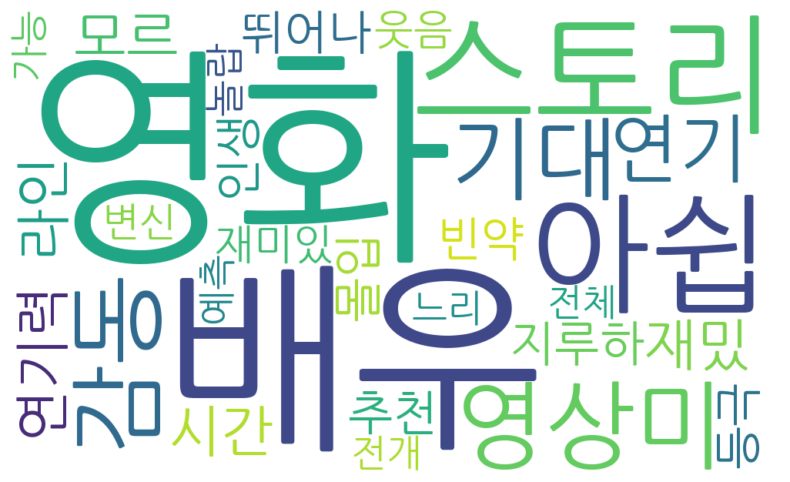

In [39]:
# wordcloud 라이브러리가 설치되어 있어야 합니다: !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=1000,
                   height=600,
                   background_color='white',
                   font_path=font_path,
                   random_state=42)
# Counter 객체로부터 워드클라우드 생성
wc.generate_from_frequencies(word_counts)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # 축 숨기기
plt.show()

#### ✏️ 연습 문제 (Practice Problems)

1.  `WordCloud` 객체를 생성할 때 `background_color`를 'black'으로, `colormap`을 'Greens'로 변경하여 새로운 워드클라우드를 만들어 보세요.
2.  `max_words` 파라미터를 10으로 설정하여, 가장 빈도가 높은 10개의 단어만으로 워드클라우드를 생성해 보세요.
3.  워드클라우드의 `mask` 인자를 활용하여 특정 모양(예: 하트, 원 등) 안에 단어들이 채워지도록 워드클라우드를 생성해 보세요. (힌트: `PIL` 또는 `imageio` 라이브러리로 마스크 이미지를 로드해야 합니다. 간단한 이미지 파일 하나를 준비해야 합니다.)

In [ ]:
# 연습 문제 1번 & 2번 & 3번 풀이 공간

---

### 6. 텍스트 기본 통계 분석

#### 💡 개념 (Concept)

단어 빈도 외에도, 각 문서(여기서는 각 리뷰)의 길이(형태소 수) 분포나 어휘의 다양성 등을 분석하는 것도 유용한 탐색적 분석 방법입니다. 예를 들어, 리뷰가 전반적으로 긴지 짧은지, 또는 긍정/부정 리뷰 그룹 간에 어휘 사용의 차이가 있는지 등을 파악할 수 있습니다.

#### 💻 예시 코드 (Example Code)

In [38]:
import pandas as pd
import plotly.express as px

# texts와 processed_texts는 이전 단어 빈도 분석 섹션에서 생성된 변수입니다.
# 원본 텍스트와 전처리된 텍스트로 DataFrame 생성
analysis_df = pd.DataFrame({'raw_review': texts, 'processed': processed_texts})

# 각 리뷰의 형태소 개수 계산
analysis_df['morpheme_count'] = analysis_df['processed'].apply(len)

print("--- 각 리뷰의 형태소 개수 (상위 5개) ---")
print(analysis_df[['raw_review', 'morpheme_count']].head())

# 리뷰 길이 분포를 히스토그램으로 시각화
fig = px.histogram(analysis_df,
                   x='morpheme_count',
                   title='리뷰 길이 분포 (형태소 개수 기준)',
                   labels={'morpheme_count': '리뷰 당 형태소 개수'},
                   nbins=5,
                   template='plotly_white',
                   color_discrete_sequence=px.colors.qualitative.Plotly) # 색상 팔레트 추가
fig.update_layout(xaxis_title="형태소 개수", yaxis_title="리뷰 수")
fig.show()

--- 각 리뷰의 형태소 개수 (상위 5개) ---
                         raw_review  morpheme_count
0          이 영화 진짜 재밌다! 배우들 연기력 최고!               4
1       스토리 라인이 조금 아쉽지만, 영상미는 좋았어요.               4
2    정말 최고의 영화! 감동적이고 시간 가는 줄 몰랐네요.               4
3       저는 좀 지루했어요... 기대보다는 별로였습니다.               2
4  배우들 연기가 너무 좋아서 몰입해서 봤습니다. 추천합니다.               4


#### ✏️ 연습 문제 (Practice Problems)

1.  `analysis_df`에 각 리뷰별로 사용된 **고유한** 형태소의 개수를 세어 `unique_morpheme_count`라는 새로운 컬럼을 추가하세요. (힌트: 리스트를 `set`으로 변환한 뒤 `len()`을 사용하면 고유한 요소의 개수를 셀 수 있습니다.)
2.  `unique_morpheme_count` 컬럼의 분포를 `plotly express`의 `box()` 플롯(박스 플롯)을 사용하여 시각화하고, 데이터의 사분위수와 이상치(outlier)를 확인해 보세요.
3.  각 리뷰의 원본 길이(`raw_review`의 문자열 길이)와 형태소 개수(`morpheme_count`) 간의 상관 관계를 `plotly express`의 `scatter` 플롯(산점도)으로 시각화해 보세요.

In [ ]:
# 연습 문제 1번 & 2번 & 3번 풀이 공간